## <span style="color:#0073C0">Question 7.6</span>
The thin metallic blade in the figure below is made of brass (elastic modulus $E=97~\mathrm{GPa}$ , density $\rho=8500~\mathrm{kg/m^3}$) and used as a tuning device for musical instruments.

a) Find the thickness of the blade $t$ that will ensure the blade has a natural frequency that’s equal to a key of A<sub>4</sub>, which is $440$ Hz.

b) If the blade is made to vibrate by impacting it with a metal sphere of mass $m = 1$ g
with speed $v_0 = 1.4$ m/s at $x_0 = 2L/3$, how much out of tune will the blade resonate?
Give your answer in percentage relative to the key of A<sub>4</sub> ($440$ Hz).

c) Find the corresponding amplitude of vibration of the tuning blade.


<p align="center">
    <img src="resources/Q7_6.png" width="600"> 
</p>
<p></p>
<center>Figure 1: Tuning device impacted by mass, from Exercise 4.1.</center>


## <span style="color:#0073C0">Example Solution</span>
To find the thickness of the blade $t$ that ensures the blade has a natural frequency
of $440$ Hz we need to find the second moment of area of the blade $I$. For this solution we will assume the following normalised shape function for the beam

$$ X(x) = \left(\frac{x}{L}\right)^2 $$

which verifies the geometrical boundary conditions at the clamped end: $X(x = 0) = 0$ and
$X'(x = 0) = 0$. It should be noted that this shape function verifies the boundary conditions at $x = 0$ but it does not ensure the correct bending moment on the beam (for this we would need a cubic shape function). The natural frequency of the beam can be found using Rayleigh’s method as

$$ \omega^2_1 = \int_0^L EI \left(\frac{\mathrm{d}^2 X}{\mathrm{d} x^2}\right)^2 \mathrm{d}x \big/\int_0^L \rho A X^2 \mathrm{d}x $$

where, using the above shape function,

$$ \left(\frac{\mathrm{d}^2 X}{\mathrm{d} x^2}\right)^2 = \frac{4}{L^4} \quad \mathrm{and} \quad X^2 = \frac{x^4}{L^4}$$

The natural frequency becomes

$$ \omega^2_1 = EI \int_0^L \frac{4}{L^4} \mathrm{d}x \big/ \left( \rho A \int_0^L \frac{x^4}{L^4} \mathrm{d}x \right) = \frac{20EI}{\rho A L}\left(\frac{1}{L^3}\right) $$

As the cross section of the beam is rectangular $I = bt^3/12$ and $A = bt$, leading to

$$ \omega^2_1 = \frac{5}{3}\frac{Et^2}{\rho L^4} \quad \Rightarrow \quad t = \omega_1 L^2 \sqrt{\frac{3\rho}{5E}} $$

Substituting all known values leads to

$$ t = 2\pi \times 440 \times (36\times10^{-3})^2\sqrt{\frac{3 \times 8500}{5 \times 97 \times 10^9}} = 0.8 \times 10^{-3} = 0.8\mathrm{mm} $$

We now find the modified frequency after an impact with a metal sphere of mass $m = 1$ g
with speed $v_0 = 1.4$ m/s at $x_0 = 2L/3$, which is

$$ \bar{\omega}^2_1 = \omega^2_1 \big/ \left(1 + \frac{mX(x_0)}{\rho A \int_0^L X^2 \mathrm{d} x} \right)$$

Substituting the known values and applying appropriate rounding

$$ \bar{\omega}^2_1 = 2\pi \times 440 \big/ \sqrt{1 + \frac{1\times10^{-3}\times X(2L/3)}{8500 \times 7 \times 10^{-3} \times 0.8 \times 10^{-3} \int_0^L X^2 \mathrm{d}x}}$$

and knowing that

$$ X\left(\frac{2L}{3}\right) = \frac{4}{9} \quad \mathrm{and} \quad \int_0^L X^2 \mathrm{d}x = \frac{L}{5} $$

the modified frequency becomes $\bar{\omega}_1 = 1824.2$ rad/s, which is a $34.0$% lower than the natural frequency of the tuning blade. In the impact situation described above, the amplitude of vibration of the tuning blade can be calculated with the following relation

$$ A_1 = \frac{mv_0X(x_0)}{ \bar{\omega}_1 \rho A \int_0^L X^2 \mathrm{d}x} = \frac{20 m v_0}{9 \bar{\omega}_1 \rho A L } $$

Finally, substituting the known values we get

$$A_1 = \frac{20 \times 1 \times 10^{-3} \times 1.4}{9 \times 1818.8 \times 8500 \times 7 \times 10^{-3} \times 0.8 \times 10^{-3} \times 36 \times 10^{-3}} = 0.995 \times 10^{-3} \approx 1.0 \mathrm{mm}$$

## <span style="color:#0073C0">Interactive visualisation</span>
Here we develop an interactive plot where you can vary the input variables and see the resulting beam deflection. First, import the Python libraries we will need:

In [1]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.patches as patches
from matplotlib.patches import FancyArrow, Rectangle

### Customisation

The following parameters can be modified: 
 - $L$ (`L`) [mm] is the length of the brass blade;
 - $\rho$ (`rho`) [kg/m^3] is the density of the brass blade;
 - $E$ (`E`) [GPa] is the modulus of elasticity;
 - $b$ (`b`) [mm] is the width of the blade;
 - $\omega_1$ (`omega_1`) [Hz] is the blade natural frequency;
 - $m$ (`m`) [g] is the mass of the impacting metal sphere;
 - $x_0/L$ (`x_0/L`) [-] is the fraction of the blade length at which the mass impacts;  and
 - $v_0$ (`v_0`) [m/s] is the velocity of the metal sphere.

In [2]:
# Setting up initial value for plots 
L = 36.0e-3
b = 7.0e-3
rho = 8500.0
E = 97.0e9
omega_1 = 440.0 
m = 1.0e-3
v_0 = 1.4
x_0 = 2.0 * L / 3.0

### Solution

This code still makes use of the normalised shape function for the beam 

$$ X(x) = \left(\frac{x}{L}\right)^2 $$ 

In [3]:
"""
The normalised shape function used for the blade
"""
def shape_function(x,L):
    return (x/L)**2

and solves for the thickness of the blade $t$ from the natural frequency as shown above. Next the modified frequency $\bar{\omega}_1$ is calculated along with the amplitude of vibration $A_1$.

In [4]:
"""
Calculated the thickness, area, moment of area of the blade, modified frequency, 
and amplitude of vibration. The discretises the shape function into 100 points. 
"""
def calc_props(L,b,rho,E,omega_1,m,v_0,x_0):
    num_points = 100;
    num_amps = 10;
    sf_int = L / 5 # hard-coded shape function integral
    w_1 = 2.0 * np.pi * omega_1
    t = w_1 * (L**2) * np.sqrt((3.0 * rho) / (5.0 * E))
    area = b*t
    I = (b*t**3)/12
    w_1_bar = w_1 / np.sqrt(1.0 + ((m*shape_function(x_0,L)) / (rho*area*sf_int)))
    freq_1 = w_1_bar / (2.0 * np.pi)
    A_1 = (m*v_0*shape_function(x_0,L)) / (w_1_bar*rho*area*sf_int)    
    points = np.linspace(0, L, num=num_points, endpoint=True)
    amps = np.linspace(0, A_1, num=num_amps, endpoint=True)
    amps = np.append(amps, np.linspace(A_1, 0, num=num_amps, endpoint=True), axis=None)
    amps = np.append(amps, np.linspace(0, -A_1, num=num_amps, endpoint=True), axis=None)
    amps = np.append(amps, np.linspace(-A_1, 0, num=num_amps, endpoint=True), axis=None)
    amps = np.append(amps, amps, axis=None)
    amps = np.append(amps, amps, axis=None)
    sf_points = np.zeros(num_points)
    disps = np.zeros((4*4*num_amps,num_points))
    for k, point in enumerate(points):
        sf_points[k] = shape_function(point, L)    
    for k, amp in enumerate(amps):
        disps[k,:] = sf_points*amp
    h_height = L*1e3/5 # Arbitrary constants, produces nicest looking plot
    h_width = L*1e3/40 # Arbitrary constants, produces nicest looking plot
    return t, A_1, points, disps, h_height, h_width, w_1_bar

# Get the blade thickness, amplitude, shape function, modified frequency and drawing parameters
t, A_1, points, disps, h_height, h_width, w_1_bar = calc_props(L,b,rho,E,omega_1,m,v_0,x_0)

### Plotting

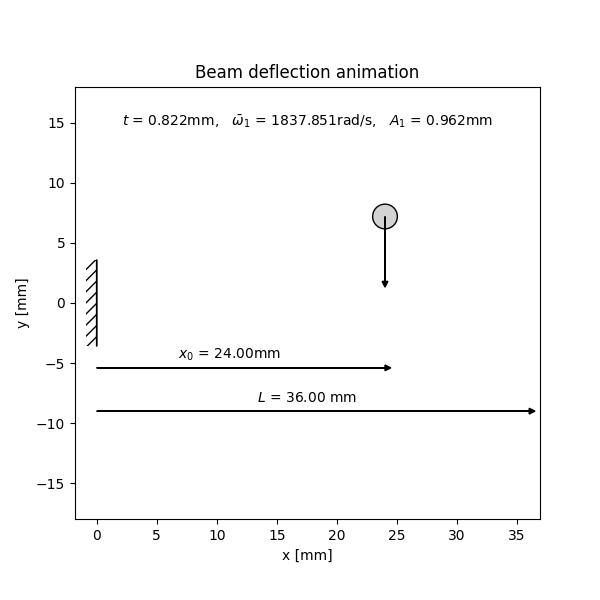

In [5]:
"""
The function called by animation.FuncAnimation. This sets the blade position frame by frame.
"""

def animate(i):
    x = 1e3*points
    y = 1e3*disps[i,:]
    blade.set_data(x,y)
    ax_an.autoscale_view()
    return blade,

# Setting up the figure
fig = plt.figure(figsize=(6,6))
# Setting up the axes with the appropriate limits (normalised by length of blade)
ax_an = plt.axes(xlim=(-2*h_width, (1e3*L)+h_width), ylim=(-L*1e3/2,L*1e3/2))
# boundary_rect = Rectangle((-0.1, -0.5), 0.2, 1, fill=True, color='black')
# Placing the 
ax_an.add_patch(patches.Circle([x_0*1.0e3,h_height], h_height/7, facecolor='#d3d3d3', edgecolor ='black'))
ax_an.add_patch(patches.Rectangle((-h_width,-h_height/2), h_width, h_height, linewidth=0, fill=None, hatch='///'))
# Placing all the arrows on the axis
ax_an.add_patch(FancyArrow(0, -1.5*h_height/2, x_0*1e3, 0.0, head_width=h_height/15, head_length=h_height/15, fc='k', ec='k'))
ax_an.add_patch(FancyArrow(0, -2.5*h_height/2, L*1e3, 0.0, head_width=h_height/15, head_length=h_height/15, fc='k', ec='k'))
ax_an.add_patch(FancyArrow(x_0*1.0e3, 2.0*h_height/2, 0.0, -3*h_height/4, head_width=h_height/15, head_length=h_height/15, fc='k', ec='k'))
ax_an.add_patch(FancyArrow(0.0, -h_height/2, 0.0, h_height, head_width=None, head_length=None, fc='k', ec='k', zorder=100))    


# Setting up the "property", "x_0", and "L" text boxes
prop_text = plt.text(.5, .92, r'$t$ = {0:.3f}mm,$\quad$$\bar\omega_1$ = {1:.3f}rad/s,$\quad$$A_1$ = {2:.3f}mm'
         .format(round(1e3*t,3),round(w_1_bar,3),round(1e3*A_1,3)), horizontalalignment='center', 
         verticalalignment='center', transform=ax_an.transAxes, bbox={'facecolor':'none', 'edgecolor':'none'})
x0_text = ax_an.text((x_0/L)/2.0, 0.38, r'$x_0$ = {0:.2f}mm'.format(round(1e3*x_0,2)), horizontalalignment='center', 
         verticalalignment='center', transform=ax_an.transAxes, bbox={'facecolor':'none', 'edgecolor':'none'})
L0_text = plt.text(.50, .28, r'$L$ = {0:.2f} mm'.format(round(1e3*L,2)), horizontalalignment='center', 
         verticalalignment='center', transform=ax_an.transAxes, bbox={'facecolor':'none', 'edgecolor':'none'})

# ax_an.add_patch(boundary_rect)
# Setting axis properties, labels and titles 
ax_an.set_aspect('equal')
ax_an.relim()
ax_an.autoscale_view()
blade, = ax_an.plot([], [], lw=1.0)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('Beam deflection animation')

# Setting up the animation function, giving it the figure handle and "animate" function as arguments
ani = animation.FuncAnimation(fig, animate, frames=len(disps), interval=1/w_1_bar * 1000, blit=True)
# plt.close(ani._fig)

# HTML(ani.to_html5_video())

Where
 - $L$ is the length of the brass blade;
 - $\rho$ is the density of the brass blade;
 - $m$ is the mass of the impacting metal sphere;
 - $x_0/L$ is the fraction of the blade length at which the mass impacts;
 - $E$ is the modulus of elasticity;
 - $v_0$ is the velocity of the metal sphere;
 - $b$ is the width of the blade; and
 - $\omega_1$ is the blade natural frequency.